<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/Text_Mining_Assignment(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We are given with the dataset of Amazon.
# We need to perform Emotion Mining

In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
oneplus_reviews=[]

In [ ]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [ ]:
oneplus_reviews = list(set(oneplus_reviews))

In [ ]:
txt_upd = ' '.join(oneplus_reviews)

In [ ]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [ ]:
text_tokens = word_tokenize(txt_upd)

In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [ ]:
tf = TfidfVectorizer()

In [ ]:
text_tf = tf.fit_transform(tokens_without_sw)

In [ ]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df

,aah,absence,absent,absolutely,accepting,accessed,accidental,accuracy,accurate,activate,...,worried,worry,worst,xs,year,years,yellowish,youtube,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_list = ' '.join(df)

In [ ]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

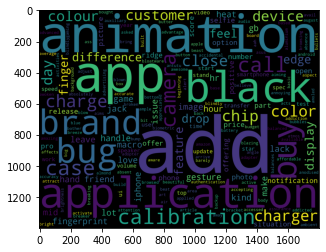

In [ ]:
plt.imshow(wordcloud)

SENTIMENTAL ANALYSIS

In [ ]:
# Positive Words

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving positive-words.txt to positive-words.txt


In [ ]:
import pandas as pd
txt_data = pd.read_table("positive-words.txt")

In [ ]:
txt_data[35:]

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
35,abounds
36,abundance
37,abundant
38,accessable
39,accessible
...,...
2034,youthful
2035,zeal
2036,zenith
2037,zest


In [ ]:
# Negative words

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words (1).txt


In [ ]:
for line in open('negative-words.txt', encoding='utf-8'):
  print(line)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

; 

; Opinion Lexicon: Negative

;

; This file contains a list of NEGATIVE opinion words (or sentiment words).

;

; This file and the papers can all be downloaded from 

;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

;

; If you use this list, please cite one of the following two papers:

;

;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 

;       Proceedings of the ACM SIGKDD International Conference on Knowledge 

;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 

;       Washington, USA, 

;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 

;       and Comparing Opinions on the Web." Proceedings of the 14th 

;       International World Wide Web conference (WWW-2005), May 10-14, 

;       2005, Chiba, Japan.

;

; Notes: 

;    1. The appearance of an opinion word in a sentence does not necessarily  

;       mean th

UnicodeDecodeError: ignored

In [ ]:
negative_words = line[:]

In [ ]:
negative_words

'inimical\n'

In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [ ]:
txt_pos_in_pw = ' '.join([word for word in df if word in line])

In [ ]:
txt_pos_in_pw

'mic'

In [ ]:
wordcloud_pos = WordCloud(background_color='black',width=1800,height=14).generate(txt_pos_in_pw)

In [ ]:
# Conclusion

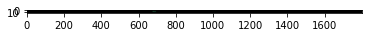

In [ ]:
plt.imshow(wordcloud_pos)

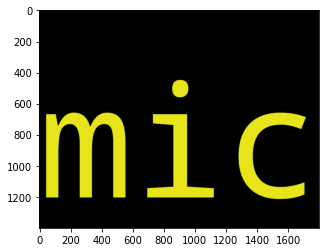

In [ ]:
plt.imshow(wordcloud_neg)